In [3]:
## Basic tools for data processing and visualizations and 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # a comprehensive library for data visualization
import os # functions for interacting with the operating system
import tensorflow as tf
from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.utils import to_categorical #create one-hot-encoded output
from sklearn.utils import class_weight #calculate class weights for training using the labels

## Tools for building Recurrent Neural Networks applied in this project
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer #A text tokenizer to vectorize a text corpus
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix
from tensorflow.keras.models import Sequential #Sequential model methods
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, Activation, Embedding, LSTM, Bidirectional #The applicable layers used in RNN model
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score # final metrics
from tensorflow.keras.callbacks import EarlyStopping # to monitor training and stop when metrics stop improving

## Extra tools needed for review data preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [6]:
#Reading the data into traindata and testdata
traindata = pd.read_csv("drugsComTest_raw.csv") # 75% trainfraction
testdata = pd.read_csv("drugsComTest_raw.csv") # 25% testfraction

In [7]:
traindata.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46


In [9]:
# Preprocessing the used review column data

# Removing unnecessary words and numbers from train data
traindata['review'] = traindata['review'].str.replace(r"[^a-z'A-Z]+", " ") #removing everything else except letters
traindata['review'] = traindata['review'].str.replace('&#039;', "'") #removing HTML from the data
traindata['review'] = traindata['review'].str.replace('&\w+;',' ') #removing special letters

# Removing unnecessary words and numbers from test data
testdata['review'] = testdata['review'].str.replace(r"[^a-z'A-Z]+", " ")
testdata['review'] = testdata['review'].str.replace('&#039;', "'") 
testdata['review'] = testdata['review'].str.replace('&\w+;',' ') 

# Transforming all letters to lowercase for train and test sets
traindata['review'] = traindata['review'].map(lambda x: x.lower())
testdata['review'] = testdata['review'].map(lambda x: x.lower())

# Test print same columns than in the cell above to see if the data is now more usable
traindata.tail()

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
U:\Users\jk026110\AppData\Local\Temp\ipykernel_5100\2035450855.py:6: SyntaxWarning: invalid escape sequence '\w'
  traindata['review'] = traindata['review'].str.replace('&\w+;',' ') #removing special letters
U:\Users\jk026110\AppData\Local\Temp\ipykernel_5100\2035450855.py:11: SyntaxWarning: invalid escape sequence '\w'
  testdata['review'] = testdata['review'].str.replace('&\w+;',' ')


,uniqueID,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""i have taken tamoxifen for 5 years. side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""i've been taking lexapro (escitaploprgram) si...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""i'm married, 34 years old and i have no kids....",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""i was prescribed nucynta for severe neck/shou...",1,28-Nov-11,20
53765,113712,Arthrotec,Sciatica,"""it works!!!""",9,13-Sep-09,46


In [10]:
# Lemmatizing words in reviews to recude the amount of different expressions with identical sentimental value

lemmatizer=WordNetLemmatizer()

# lemmatizing verbs in train and test reviews
traindata['review'] = traindata['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(x)))
testdata['review'] = testdata['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(x)))

# lemmatizing nouns in train and test reviews
traindata['review'] = traindata['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(x)))
testdata['review'] = testdata['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(x)))

In [11]:
## Removing unnecessary stopwords from reviews which have no sentimental predictive value

# Selecting the english language stopwords to be used for filtering the text
stopwords = stopwords.words('english')

# Removing english stopwords from both train and test data
traindata['review'] = traindata['review'].map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopwords))
testdata['review'] = testdata['review'].map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopwords))

In [12]:
# Test print same columns as before to see if the data has a more usable form after processing
traindata.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention",`` take tamoxifen 5 year . side effect severe ...,10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,`` 've take lexapro ( escitaploprgram ) since ...,9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"`` 'm marry , 34 year old kid . take pill hass...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,`` prescribe nucynta severe neck/shoulder pain...,1,28-Nov-11,20
53765,113712,Arthrotec,Sciatica,`` work ! ! ! ``,9,13-Sep-09,46


In [13]:
## Create three categories for ratings (positive, neutral, negative)

# label = 2, when rating = 7-10 (positive)
# label = 1, when rating = 5-6 (neutral)
# label = 0, when rating = 1-4 (negative)

# Extracting the explanatory variables (x) and response variables (y=rating)

train_x = traindata['review'].values.tolist()
train_y = traindata['rating'].values
for i in range(len(train_y)):
    x = train_y[i]
    if x >= 7:
        train_y[i]=2 #reviews higher than 6 get labes 2, which stands for positive
    elif x > 4:
        train_y[i]=1 #reviews higher than 4 but lower than 7 get labes 1, which stands for neutral
    else:
        train_y[i]=0 #the rest (reviews lower than 5) are labelled 0, and are considered negative

test_x = testdata['review'].values.tolist()
test_y = testdata['rating'].values
for i in range(len(test_y)):
    x = test_y[i]
    if x >= 7:
        test_y[i]=2 
    elif x > 4:
        test_y[i]=1 
    else:
        test_y[i]=0 
    
# Check that the labels are correct by displaying the same tail of traindata as in cells above
train_y[161292:]

array([], dtype=int64)

In [14]:
## Tokenize the traindata review contents

# Initialize Tokenizer
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_x)

# Convert reviews to integer sequences (according to the words indexed in the previous step)
train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# Test print
print("Train sequences:")
print(train_sequences[0])

# The reviews are padded to have equal length
maxlen = 100
train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen = maxlen)
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen = maxlen)

# Test print after padding
print("\nTrain sequences after padding:")
print(train_sequences[0])

Train sequences:
[16, 27, 552, 7, 1335, 2192, 1958, 571, 29, 80, 282, 103, 43, 31, 406, 90, 1686, 3860, 1834, 37, 389, 39, 1340, 13, 11, 513, 1087, 34, 63, 16, 210, 71, 1109, 34, 44, 597, 351, 1834, 389]

Train sequences after padding:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   16   27  552    7 1335 2192 1958  571   29
   80  282  103   43   31  406   90 1686 3860 1834   37  389   39 1340
   13   11  513 1087   34   63   16  210   71 1109   34   44  597  351
 1834  389]


In [15]:
# One hot encoding train and test labels (y-values)

# Test print before one hot encoding
print("Labels before one hot encoding:")
print(train_y[161292:])

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Test print after one hot encoding
print("\nAfter one hot encoding:")
print(train_y[161292:])

Labels before one hot encoding:
[]

After one hot encoding:
[]


In [16]:
## Simple LSTM network that was selected as the final model

# Create a sequential model including Embedding, LSTM and Dense layers
model = Sequential()
#NOTE - embedding layer to turn positive integers (indexes) into dense vectors of fixed size "maxlen" !needs to be the first layer
model.add(Embedding(5000, 16, input_length = maxlen))
model.add(LSTM(16, dropout = 0.2, recurrent_dropout = 0.2))
#NOTE - output layer, needs to be the same size as number of classes
model.add(Dense(3, activation = 'softmax')) 

# model.summary() - disabled for final run as the model can be seen in the code cell here as well.

u:\Users\jk026110\tekstianalyysi\env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
# Compiling the models and calculating appropriate weights for the classes

#categorical_crossentropy because of problem being multiclass
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc']) 

# Calculating class weights for setting weights during training
# disabled after settling on final model as discussed further

train_y_int = np.argmax(train_y, axis=1) #casting one-hot labels back to integer
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_y_int), y=train_y_int) #using sklearn.class_weight to calculate balanced weights
dict_class_weights = dict(enumerate(class_weights)) #creating a dictionary for the weights

#print the calculated class weights for each class
print('Weights for each class:')
print(dict_class_weights)

Weights for each class:
{0: np.float64(1.3278506334741054), 1: np.float64(3.7113273969766), 2: np.float64(0.5056997742663657)}


In [ ]:
# Train the model by fitting the data

# Settings for training
epochs = 10 #this would be set higher when using callbacks to stop the training as setup
patience = 0.1 * epochs
callbackmethod = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.01, verbose=1, patience=patience)

# Training the model with weights
history = model.fit(train_sequences, train_y, 
                    epochs = epochs,
                    batch_size = 32, 
                    validation_split = 0.2)
                    #callbacks=[callbackmethod]) - disabled for final run
                    #class_weight = dict_class_weights - disabled after settling on final model as discussed further
# 3min37sek

Epoch 1/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - acc: 0.6778 - loss: 0.7993 - val_acc: 0.7535 - val_loss: 0.6433
Epoch 2/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - acc: 0.7592 - loss: 0.6360 - val_acc: 0.7636 - val_loss: 0.6220
Epoch 3/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - acc: 0.7725 - loss: 0.6126 - val_acc: 0.7646 - val_loss: 0.6173
Epoch 4/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - acc: 0.7814 - loss: 0.5901 - val_acc: 0.7685 - val_loss: 0.6063
Epoch 5/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - acc: 0.7850 - loss: 0.5772 - val_acc: 0.7702 - val_loss: 0.5996
Epoch 6/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - acc: 0.7880 - loss: 0.5632 - val_acc: 0.7720 - val_loss: 0.5999
Epoch 7/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - acc: 0.7917 - loss: 0.5565 - val_acc: 0.7726 - val_loss: 0.5940
Epoch 8/10
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - acc: 0.7929 - loss: 0.5516 - val_acc: 0.7718 - val_loss: 0.5941
Epoch 9/10
1345/1345 ━━━

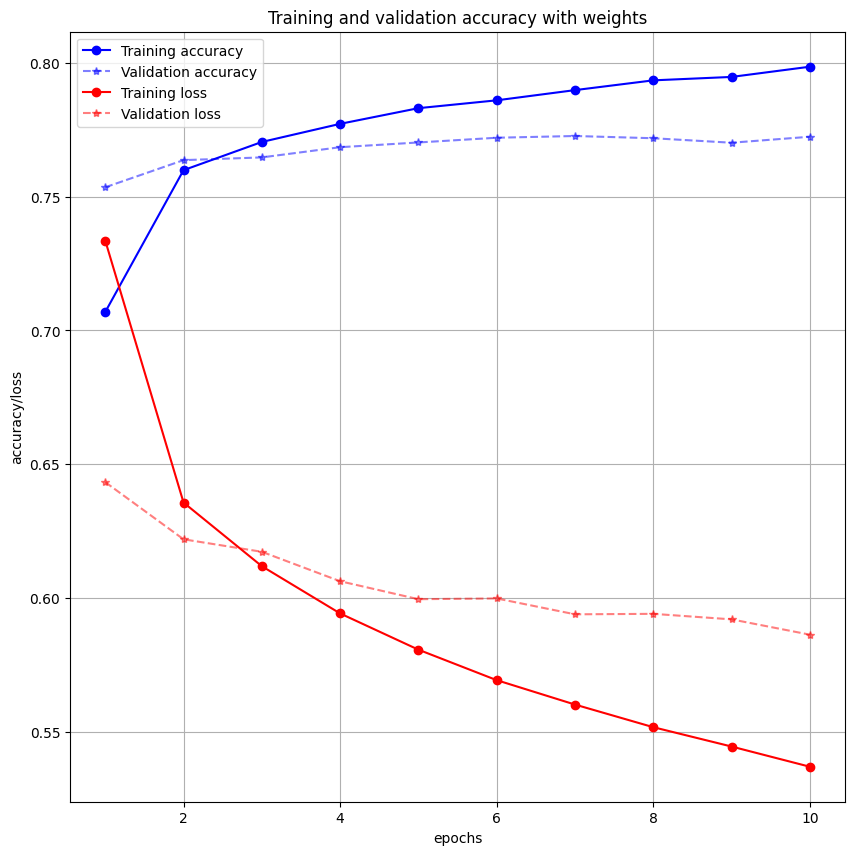

In [20]:
# Checking the the accuracy and loss graphs for the training done

plt.figure(figsize=(10,10))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo-', label = "Training accuracy")
plt.plot(epochs, val_acc, 'b*--', alpha=0.5, label = "Validation accuracy")
plt.plot(epochs, loss, 'ro-', label = "Training loss")
plt.plot(epochs, val_loss, 'r*--', alpha=0.5, label = "Validation loss")
plt.title('Training and validation accuracy with weights')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.grid()
plt.legend()

plt.show()

In [21]:
# Use the model to predict unseen test set and compare the results to known true labels

# assigning predicted values (argmax used to convert one-hot back to int)
predicted = np.argmax(model.predict(test_sequences), axis = 1)
truevalue = np.argmax(test_y, axis = 1)

# creating a classification report
cr = classification_report(truevalue, predicted)

print(cr)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     13497
           1       0.47      0.06      0.10      4829
           2       0.84      0.93      0.88     35440

    accuracy                           0.80     53766
   macro avg       0.68      0.57      0.57     53766
weighted avg       0.77      0.80      0.77     53766



In [22]:
# Calculating the confusion matrix showing all predictions made for test set

# creating a confusion matrix
cm = confusion_matrix(truevalue, predicted).T
print(cm)

[[ 9775  1675  2147]
 [  140   279   172]
 [ 3582  2875 33121]]


In [23]:
# Calculating the cohen's kappa for test set predictions with linear and quadratic weights (weighted training)

kappa = cohen_kappa_score(truevalue, predicted)
print(f"Cohen's kappa (linear)    = {kappa:.3f}")
quadkappa = cohen_kappa_score(truevalue, predicted, weights = 'quadratic')
print(f"Cohen's kappa (quadratic) = {quadkappa:.3f}")

Cohen's kappa (linear)    = 0.563
Cohen's kappa (quadratic) = 0.657


In [24]:
# Raw loss and accuracy calculated for the test set (weighted model)

model.evaluate(test_sequences, test_y)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.8137 - loss: 0.4997


[0.5194042325019836, 0.8030167818069458]